In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
df = pd.read_csv("Personality.csv")


In [3]:
df.head()

,movie_preferences,social_media_activity,reading_habits,favorite_leisure_activities,music_taste,fashion_style,travel_preferences,personality_behaviour
0,Science Fiction,Fashion,Short Stories,Gaming,EDM,Casual,Road Trips,Complex
1,Mystery,Fashion,Novels,Sports,Classical,Sporty,Family Holidays,Complex
2,Mystery,Food,Comics,Sports,Jazz,Classic,Solo Travel,Complex
3,Comedy,Lifestyle,Short Stories,Drawing,Classical,Casual,Adventure,Versatile
4,Mystery,Lifestyle,Short Stories,Gaming,Classical,Vintage,Solo Travel,Complex


In [4]:
X = df[['movie_preferences', 'social_media_activity', 'reading_habits', 'favorite_leisure_activities', 'music_taste', 'fashion_style', 'travel_preferences']]
y = df['personality_behaviour']

# Convert categorical variables to numerical using one-hot encoding
X1 = pd.get_dummies(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3,random_state=109)


In [6]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [7]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7066666666666667


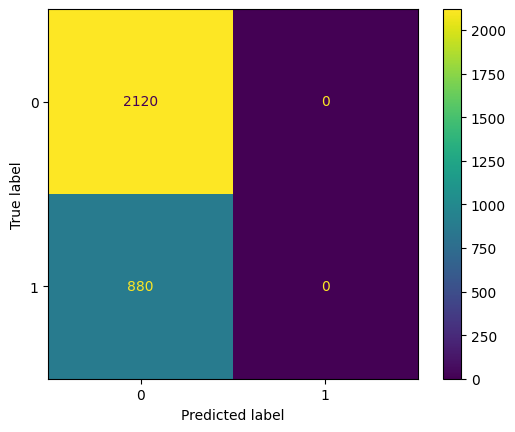

In [8]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Complex       0.71      1.00      0.83      2120
   Versatile       0.00      0.00      0.00       880

    accuracy                           0.71      3000
   macro avg       0.35      0.50      0.41      3000
weighted avg       0.50      0.71      0.59      3000



c:\Users\Kunal Pandit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kunal Pandit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kunal Pandit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [10]:
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[2120    0]
 [ 880    0]]
Accuracy :  0.7066666666666667
Sensitivity :  1.0
Specificity :  0.0


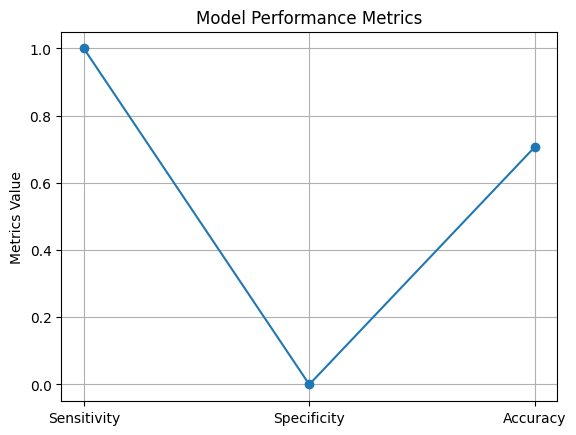

In [11]:
plt.plot(['Sensitivity', 'Specificity', 'Accuracy'], [sensitivity1, specificity1, accuracy1], marker='o')

# Adding labels and title
plt.title('Model Performance Metrics')
plt.ylabel('Metrics Value')

# Display the plot
plt.grid(True)
plt.show()

In [13]:
print("F1-Score:",f1_score(y_test, y_pred, pos_label="Complex"))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(y_test, y_pred, pos_label="Complex"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(y_test, y_pred, pos_label="Complex"))


F1-Score: 0.828125
Precision: 0.7066666666666667
Recall: 1.0


In [14]:
user_data = np.array([[1,0,0,0,0,0,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1]])
prediction = clf.predict(user_data)

print("Prediction for the above data point is: ", prediction[0])

Prediction for the above data point is:  Complex


c:\Users\Kunal Pandit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
